In [3]:
# ------------------------------------------------------------------------
# Hochschule Karlsruhe - Technik und Wirtschaft
# Prof. Dr.-Ing. Matthias Stripf
#
# Python-Skript zur Auswertung der Winddaten des Deutschen Wetterdienstes
# Abgerufen vom FTP-Server des DWD: 
# ftp://ftp-cdc.dwd.de/pub/CDC/grids_germany/multi_annual/wind_parameters/
#-------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rc('font', size=11)

In [4]:
# Daten aus den Textdateien des DWD einlesen:
hoehe = 80      # in m

df_mean = pd.read_table('Winddaten/resol_200x200/wind_wdat_geo_'+str(hoehe)+'m_BRD_200m.asc',sep="\s+",header=None, skiprows=[0,1,2,3,4,5], engine='python')
df_k = pd.read_table('Winddaten/resol_200x200/weibull_kdat_geo_'+str(hoehe)+'m_BRD_200m.asc',sep="\s+",header=None, skiprows=[0,1,2,3,4,5], engine='python')
df_c = pd.read_table('Winddaten/resol_200x200/weibull_cdat_geo_'+str(hoehe)+'m_BRD_200m.asc',sep="\s+",header=None, skiprows=[0,1,2,3,4,5], engine='python')

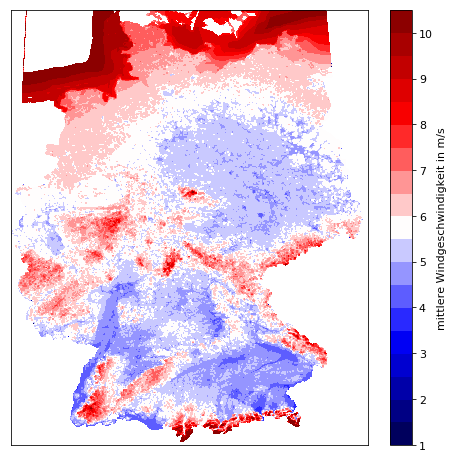

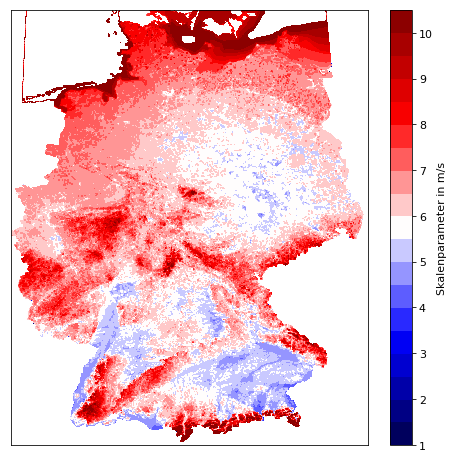

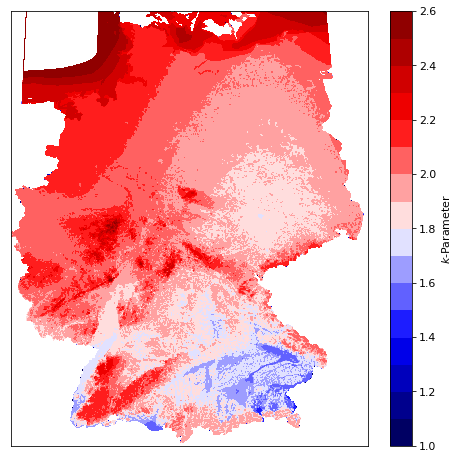

In [5]:
x = df_mean.columns
y = -1*df_mean.index
X,Y = np.meshgrid(x,y)
mean = df_mean / 10.0
c = df_c / 10.0
k = df_k / 1000.0
vel_levels = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5]
#vel_levels = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
k_levels = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6]
fig_mean = plt.figure(figsize=(8, 8))
plt.contourf(X, Y, mean, vel_levels, cmap='seismic')
plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
cbar = plt.colorbar()
cbar.ax.set_ylabel('mittlere Windgeschwindigkeit in m/s')
fig_mean.savefig("DE_"+str(hoehe)+"m_mittlere_Windgeschwindigkeit.png", bbox_inches='tight');

fig_c = plt.figure(figsize=(8, 8))
plt.contourf(X, Y, c, vel_levels, cmap='seismic')
plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Skalenparameter in m/s')
fig_c.savefig("DE_"+str(hoehe)+"m_Weibull_c.png", bbox_inches='tight');

fig_k = plt.figure(figsize=(8, 8))
plt.contourf(X, Y, k, k_levels, cmap='seismic')
plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
cbar = plt.colorbar()
cbar.ax.set_ylabel('$k$-Parameter')
fig_k.savefig("DE_"+str(hoehe)+"m_Weibull_k.png", bbox_inches='tight');

<a id='weibull'></a>
### Weibull-Verteilungen für verschiedene Standorte

Werte für Karlsruhe:
u_avg =  3.6
c_avg =  4.0
k_avg =  1.719
Werte für Cuxhaven:
u_avg =  6.4
c_avg =  7.1
k_avg =  2.173
Werte für Nordsee (Offshore):
u_avg =  10.6
c_avg =  12.4
k_avg =  2.628


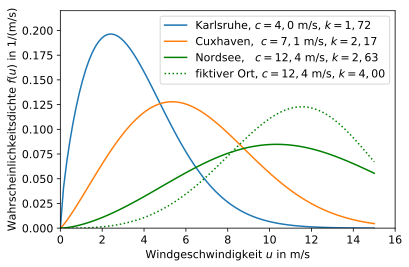

In [6]:
# Indizes für Karlsruhe (Rechtswert: 3456446, Hochwert: 5430126)
i = int((3456446-3280000)/200)
j = int((6110000-5430126)/200)
u_mean_KA = mean.iat[j,i]
c_KA = c.iat[j,i]
k_KA = k.iat[j,i]
print ("Werte für Karlsruhe:")
print ("u_avg = ", u_mean_KA)
print ("c_avg = ", c_KA)
print ("k_avg = ", k_KA)

# Indizes für Cuxhaven (Rechtswert: 3479541, Hochwert: 5969863)
i = int((3479541-3280000)/200)
j = int((6110000-5969863)/200)
u_mean_CU = mean.iat[j,i]
c_CU = c.iat[j,i]
k_CU = k.iat[j,i]
print ("Werte für Cuxhaven:")
print ("u_avg = ", u_mean_CU)
print ("c_avg = ", c_CU)
print ("k_avg = ", k_CU)

# Indizes für Offshore-Standort in der Nordsee (Rechtswert: 3418124, Hochwert: 6044212)
i = int((3418124-3280000)/200)
j = int((6110000-6044212)/200)
u_mean_NO = mean.iat[j,i]
c_NO = c.iat[j,i]
k_NO = k.iat[j,i]
print ("Werte für Nordsee (Offshore):")
print ("u_avg = ", u_mean_NO)
print ("c_avg = ", c_NO)
print ("k_avg = ", k_NO)

u = np.linspace(0.0, 15, 100)
P_KA = k_KA/c_KA * (u/c_KA)**(k_KA-1) * np.exp(-((u/c_KA)**k_KA))
P_CU = k_CU/c_CU * (u/c_CU)**(k_CU-1) * np.exp(-((u/c_CU)**k_CU))
P_NO = k_NO/c_NO * (u/c_NO)**(k_NO-1) * np.exp(-((u/c_NO)**k_NO))
P_NO2 = 4/c_NO * (u/c_NO)**(4-1) * np.exp(-((u/c_NO)**4))



%config InlineBackend.figure_format = 'svg'
fig1 = plt.figure(figsize=(6, 4))
plt.ylabel('Wahrscheinlichkeitsdichte $f(u)$ in 1/(m/s)')
plt.xlabel('Windgeschwindigkeit $u$ in m/s')
plt.xlim(0, 16)
plt.ylim(0, 0.22)
plt.plot(u, P_KA, label='Karlsruhe, $c=4,0$ m/s, $k=1,72$')
plt.plot(u, P_CU, label='Cuxhaven,  $c=7,1$ m/s, $k=2,17$')
plt.plot(u, P_NO, label='Nordsee,   $c=12,4$ m/s, $k=2,63$', color="green")
plt.plot(u, P_NO2, ":", label='fiktiver Ort, $c=12,4$ m/s, $k=4,00$', color="green")
plt.legend(loc=0);
fig1.savefig("weibull2.pdf");